In [1]:
import joblib
import pandas as pd
from sklearn.metrics import r2_score as r2

In [2]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pycaret.regression import *

In [5]:
modelo = joblib.load('modelo_runt_entrenado.pkl')

In [6]:
Data_test = pd.read_csv('Data_test.csv', encoding = 'utf-8')

In [7]:
Data_test.head()

,Year,Month,Day,Festivo,Holidays,Unidades,Dayweek_Friday,Dayweek_Monday,Dayweek_Saturday,Dayweek_Sunday,Dayweek_Thursday,Dayweek_Tuesday,Dayweek_Wednesday
0,2017,1,1,1,1,0,0,0,0,1,0,0,0
1,2017,2,1,0,0,45,0,0,0,0,0,0,1
2,2017,3,1,0,0,116,0,0,0,0,0,0,1
3,2017,4,1,0,0,232,0,0,1,0,0,0,0
4,2017,5,1,0,0,455,0,1,0,0,0,0,0


In [8]:
num = ['Year', 'Month', 'Day','Festivo','Holidays','Dayweek_Friday','Dayweek_Monday','Dayweek_Saturday','Dayweek_Sunday','Dayweek_Thursday','Dayweek_Tuesday','Dayweek_Wednesday']

### Evaluación del modelo

In [9]:
predtest = modelo.predict(Data_test[num])

In [10]:
round (r2(Data_test['Unidades'],predtest),2)*100

70.0

In [11]:
residual = Data_test['Unidades'] - predtest

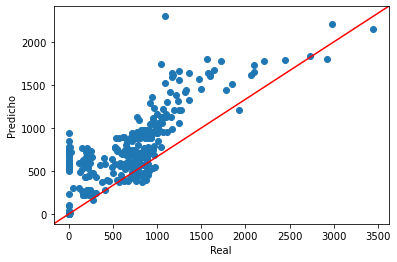

In [12]:
fig, ax = plt.subplots()
line = mlines.Line2D([0, 1], [0, 1], color='red')
ax.scatter(Data_test['Unidades'],predtest)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
#plt.title("title")
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.savefig('scatter.png', dpi = 400)
plt.show()